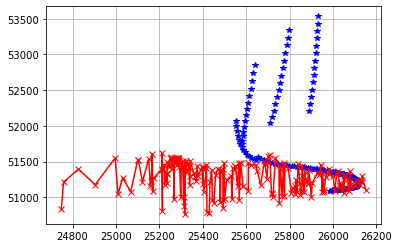

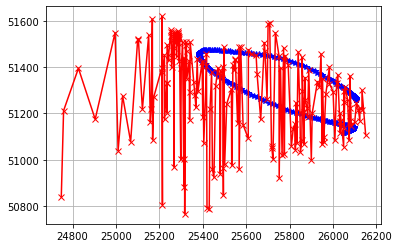

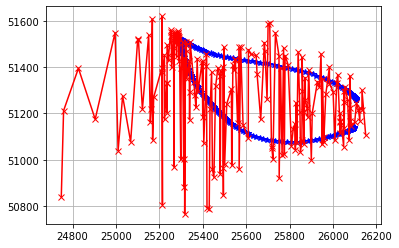

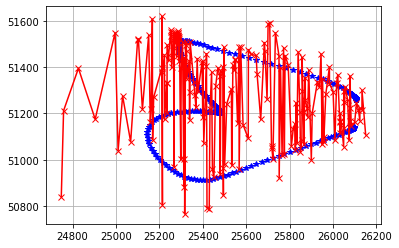

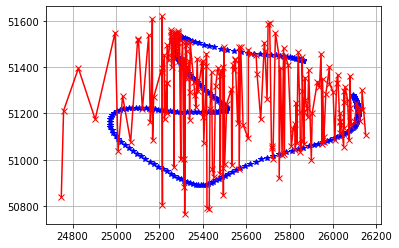

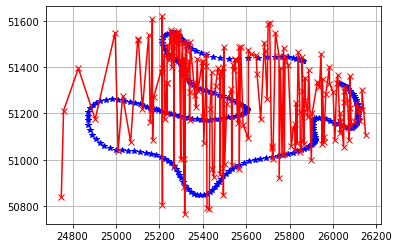

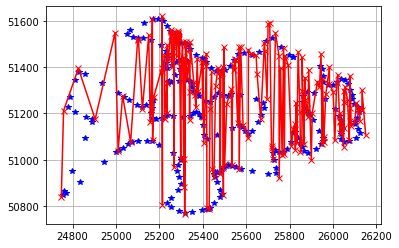

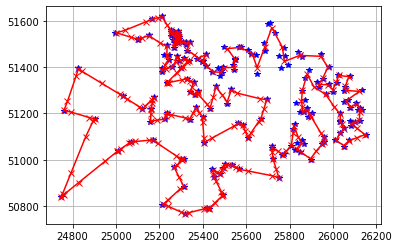

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def ans_plot(s,n_city):
    plt.figure('cities question')
    plt.plot(n_city[:, 0], n_city[:, 1], 'b*')
    plt.plot(s[:, 0], s[:, 1], '-rx')
    plt.grid()
    plt.show()
def derive_city():
  city_arr=[]
  with open('Cities.csv') as s_file:
      read_file = csv.reader(s_file)
      for r in read_file:
          city_arr.append([float(r[0].split(" ")[1]),float(r[0].split(" ")[2])])
  city_arr = np.array(city_arr)
  return city_arr
class algorithm_kohonen(object):
    def __init__(self, num, radius=None):
        self.num = num
        self.a = []
        self.radius = radius * np.random.rand()
        for i in range(18):
          for j in range(14):
            self.a.append([float(24250+100*i), float(52300+100*j)])
        self.a = np.array(self.a)

    def optimizer_sol(self,n_iterate,eta,distance,sig,city):
        for i in range(n_iterate):
            sig -= ( self.num * 0.3 - self.num*0.001 ) / n_iterate
            for j in range(len(city)):
                r_min = np.argmin(np.linalg.norm(self.a - city[j], axis=1))
                for k in range(len(self.a)):
                    self.a[k] += eta * distance(k, r_min, sig) * (city[j] - self.a[k])
            if i % 40 == 0:
              sol = np.vstack((self.a, self.a[0, :]))
              ans_plot(city, sol)
        return self.a

def main():
    num= 100
    eta = 0.25
    city = derive_city()
    n_iterates = 250
    sig = 0.3 * num
    dist = lambda radius, r_min, s: np.exp(-(np.abs(radius - r_min)**2) / (2 * s**2))
    kohonen = algorithm_kohonen(num, radius=1.0)
    kohonen.optimizer_sol(n_iterates,eta,dist,sig,city)
    solution = np.vstack((kohonen.a, kohonen.a[0, :]))
    ans_plot(solution,city)
if __name__ == '__main__':
    main()
    

# New Section